In [1]:
!pip -q install ./python

Invalid requirement: './python'
It looks like a path. Does it exist ?


In [2]:
from unityagents import UnityEnvironment
#from dqn_agent import Agent
from dqn_window_agent import Agent
from utils import get_datefmt_str
from train import train_rl

import numpy as np

from collections import deque
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as lines

saved_scores=[]

TRAINING_PARAMS = {
    "REPLAY_BUFFER_SIZE": int(1e5),
    "BATCH_SIZE": 64,
    "GAMMA": 0.95,
    "TAU": 5e-2,
    "LEARNING_RATE": 5e-3,
    "UPDATE_TARGET_NET_STEPS": 4,
    "SEED": int(1234),
}

In [3]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

dqn_agent=Agent(state_size, action_size, TRAINING_PARAMS)

print("agent instantiated")

scores = train_rl(agent=dqn_agent, env=env, training_params=TRAINING_PARAMS)

# plot the scores
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(np.arange(len(scores)), scores)
#plt.ylabel('Score')
#plt.xlabel('Episode #')
#`plt.show()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


agent instantiated
train
Episode 671	Average Score: 15.16	Max Score: 24.00	eps: 0.06
Environment solved in 621 episodes!	Average Score: 15.16


In [4]:
# compute the moving average for last 100 scores. Before 100, just average what you have
mov_avg_100 = np.array([np.mean(scores[idx-min(idx, 100):max(1, idx)]) for idx, s in enumerate(scores)])

# get indicies of the moving average where values are greater than 13
greater_than_13 = np.where(mov_avg_100 > 13.0)

# split where there are discontinuities in the greater_than_13 indicies
#idicies_greater_than_100 = np.split(greater_than_13[0], np.where(np.diff(greater_than_13[0]) > 1)[0]+1)[-1]

# split greater_than_13 where the discontinuities in the greater_than_13 indicies
split_indicies = np.split(greater_than_13[0], np.where(np.diff(greater_than_13[0]) > 1)[0]+1)

# get the lengths of split indicies
len_split_indices = [s.shape[0] for s in split_indicies]

# where are the len_split_indicies lengths greater than 100, last 100 episodes
first_100_idx = np.where(np.array(len_split_indices) > 99)[0][0]

# get the first 100 indicies in the found first_100_idx
first_greater_than_13 = split_indicies[first_100_idx][0:100]

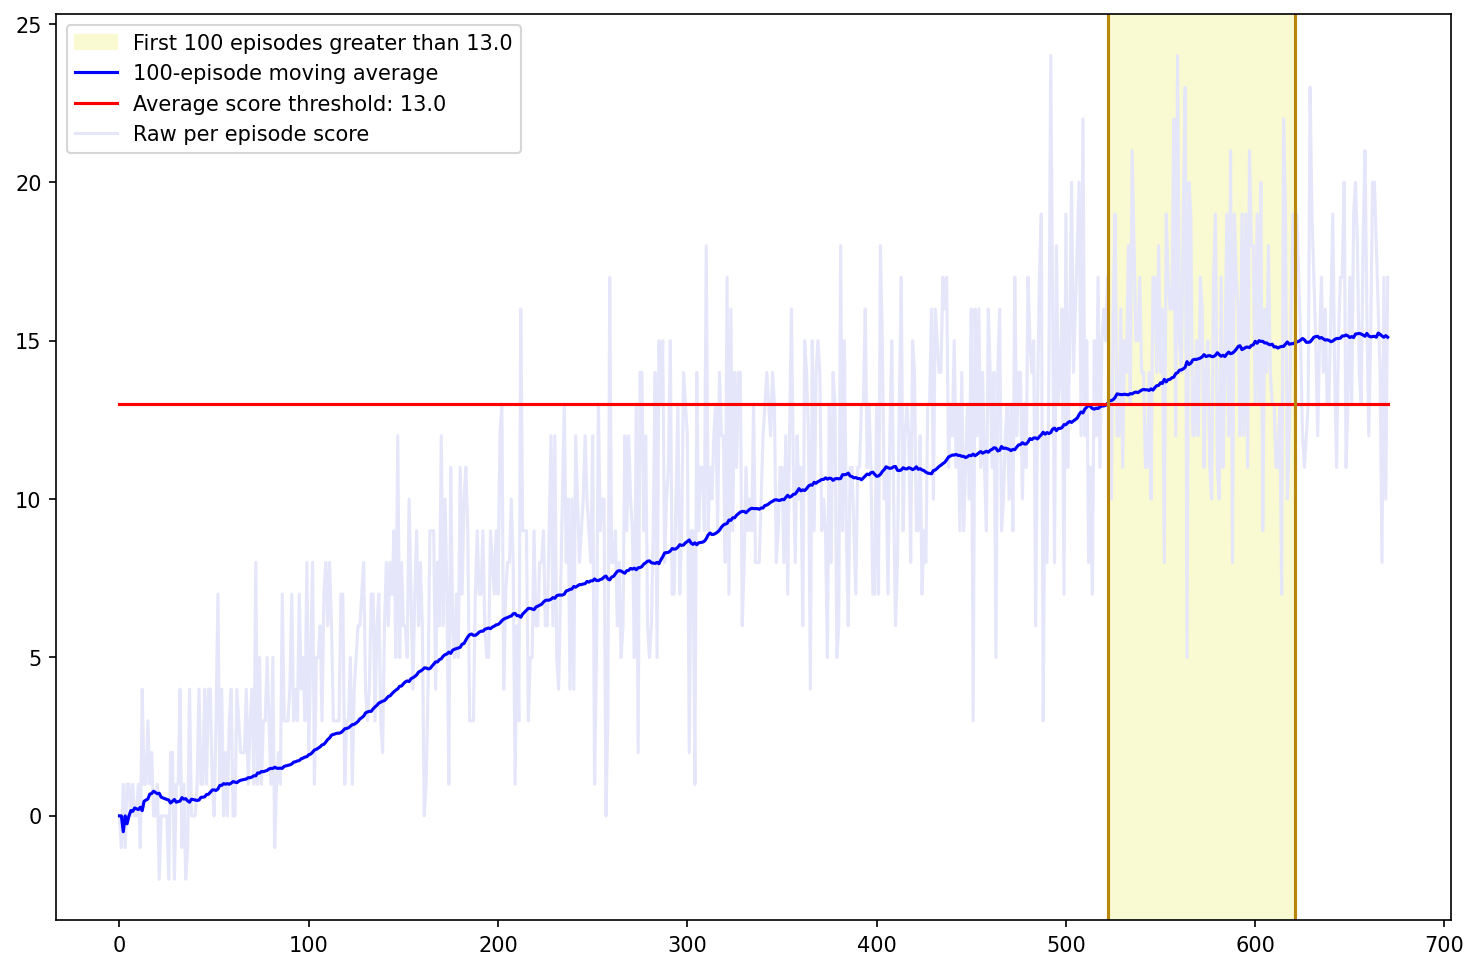

In [5]:
# plot the scores

fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111)
[plt.axvline(x=ix, color='lightgoldenrodyellow') for ix in first_greater_than_13]
plt.plot(np.arange(len(scores)), scores, color="lavender")
plt.plot(np.arange(len(scores)), mov_avg_100, color="blue")
plt.plot(np.arange(len(scores)), [13.0 for x in range(len(scores))], color="red")
plt.axvline(x=first_greater_than_13[0], color='darkgoldenrod')
plt.axvline(x=first_greater_than_13[-1], color='darkgoldenrod')

ind_greater_than_13 = mpatches.Patch(color='lightgoldenrodyellow', label='First 100 episodes greater than 13.0')
moving_average_legend = lines.Line2D([0], [0], c='blue', label="100-episode moving average")
averge_score_13 = lines.Line2D([0], [0], c='red', label="Average score threshold: 13.0")
per_episode_score = lines.Line2D([0], [0], c='lavender', label="Raw per episode score")
plt.legend(handles=[ind_greater_than_13, moving_average_legend, averge_score_13, per_episode_score])


plt.show()

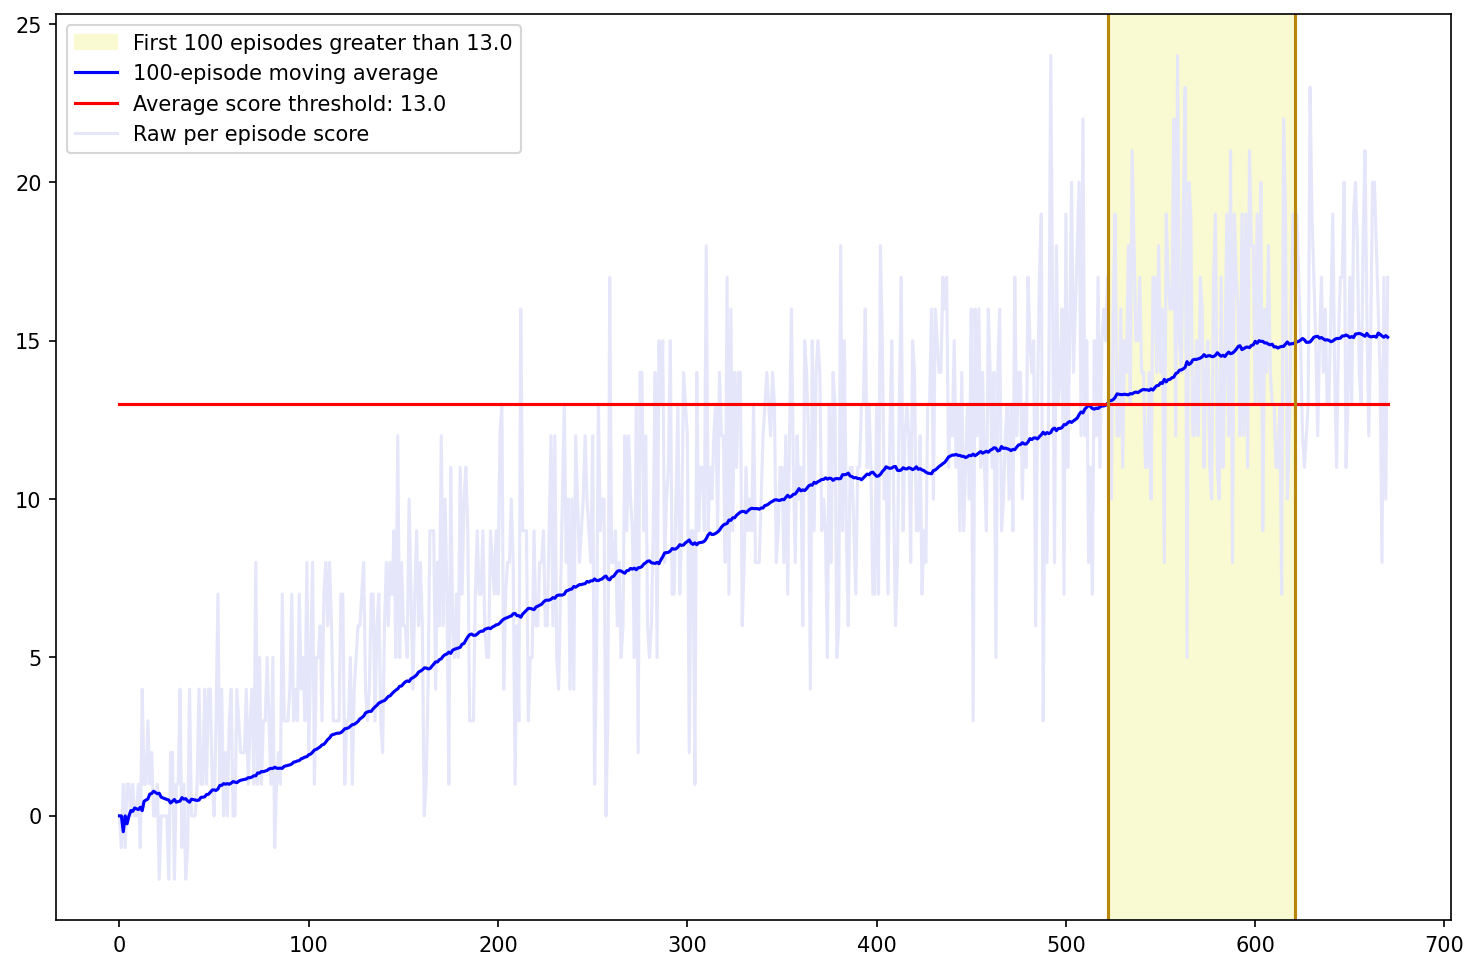

In [6]:
matplotlib.use('Agg')
fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111)
[plt.axvline(x=ix, color='lightgoldenrodyellow') for ix in first_greater_than_13]
plt.plot(np.arange(len(scores)), scores, color="lavender")
plt.plot(np.arange(len(scores)), mov_avg_100, color="blue")
plt.plot(np.arange(len(scores)), [13.0 for x in range(len(scores))], color="red")
plt.axvline(x=first_greater_than_13[0], color='darkgoldenrod')
plt.axvline(x=first_greater_than_13[-1], color='darkgoldenrod')

ind_greater_than_13 = mpatches.Patch(color='lightgoldenrodyellow', label='First 100 episodes greater than 13.0')
moving_average_legend = lines.Line2D([0], [0], c='blue', label="100-episode moving average")
averge_score_13 = lines.Line2D([0], [0], c='red', label="Average score threshold: 13.0")
per_episode_score = lines.Line2D([0], [0], c='lavender', label="Raw per episode score")
plt.legend(handles=[ind_greater_than_13, moving_average_legend, averge_score_13, per_episode_score])



plt.savefig(f'model_window_agent_{get_datefmt_str()}.png')